In [1]:
import numpy as np
from scipy.special import erf
from scipy.integrate import quad
import matplotlib.pyplot as plt
import lmfit

from IPython.display import Latex

Scipy defines erf as 

$\textrm{erf}(x) = \frac{2}{\sqrt{\pi}}  \int_0^x{\exp(-z^2)} z$  
which goes from $-1 \rightarrow 1$ as $x$ goes from $-\inf \rightarrow \inf$.   
Note that the dummy variable has been relabeled to $z$ (rather than $t$) as the latter is confusing if we   
want to use $t$ as time. 

This is equivalent to integrating a Guassian with   
$\sigma = \frac{1}{\sqrt{2}}$  
where
FHWM = $2\sigma \sqrt{2 \log{2}}$

Text(0, 0.5, 'erf(x)')

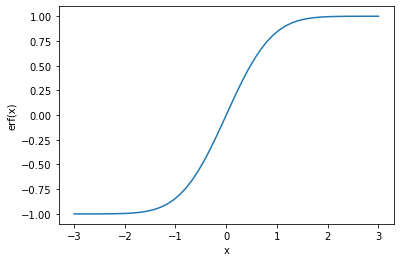

In [2]:
x = np.linspace(-3, 3)

fig, ax = plt.subplots()

ax.plot(x, erf(x))
ax.set_xlabel("x")
ax.set_ylabel("erf(x)")

The function required to go from 1 to 1-A is  
$1 - \frac{A}{2}[ 1 - \textrm{erf}(x)]$  
To to be equilvant to convolving with a Guassian of unit FWHM  
we need a variable substitutino to
$1 - \frac{A}{2}[ 1 - \textrm{erf}(2 x \sqrt{\log{2}}]$  

Text(0.5, 1.0, 'FWHM is 1.000')

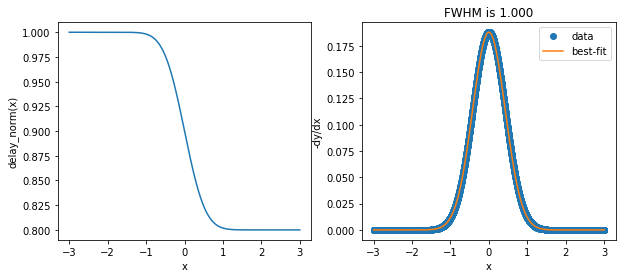

In [4]:
def delay_norm(x, A, FWHM):
    return 1- A/2*(1-erf(-x*2*np.sqrt(np.log(2))))
        
x = np.linspace(-3, 3, 5000)

fig, (ax, axr) = plt.subplots(1, 2, figsize=(10, 4))

y = delay_norm(x, A=0.2, FWHM=1)
ax.plot(x, y)
ax.set_xlabel("x")
ax.set_ylabel("delay_norm(x)")

dx = x[1] - x[0]

dy_dx = np.diff(y)/dx
model = lmfit.models.GaussianModel()
result = model.fit(-dy_dx, x=x[:-1])
result.plot_fit(ax=axr)
axr.set_xlabel("x")
axr.set_ylabel("-dy/dx")
axr.set_title("FWHM is {:.3f}".format(result.params['fwhm'].value))

So the full function is  
$1 - \frac{A}{2} - \frac{A}{\pi} \int_0^{2 x \sqrt{\log{2}}}{\exp(-z^2)} dz$  
